In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_exam_scores(1).csv to student_exam_scores(1).csv


In [2]:
import pandas as pd

df = pd.read_csv("student_exam_scores(1).csv")
df.head()   # df # df.tail()


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S198,1.6,6.9,63.8,76.0,28.2
1,S182,8.4,5.5,92.6,47.0,36.1
2,S149,3.2,7.2,85.8,50.0,26.4
3,S248,11.1,5.6,82.2,52.0,38.3
4,S145,5.7,5.6,65.6,53.0,29.9


In [3]:
# Check if file is empty
if df.empty:
    print("The file is empty!")
else:
    print("The file has data.")

# Check for empty cells
print(df.isnull().sum())


The file has data.
student_id             0
hours_studied         12
sleep_hours            7
attendance_percent     0
previous_scores        7
exam_score             5
dtype: int64


In [4]:
# Try to convert score columns to numeric, forcing errors to NaN
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now check which values became NaN (non-int or missing)
print(df[df.isnull().any(axis=1)])


    student_id  hours_studied  sleep_hours  attendance_percent  \
9         S203            3.0          NaN                75.0   
35        S282            NaN          NaN                50.3   
49        S234            7.1         10.8               116.6   
54        S286            NaN          9.0                36.9   
61        S280            7.2          NaN                64.1   
127       S202            NaN          6.5                80.0   
150       S267            7.3          5.1                58.6   
171       S205           12.0          2.0                85.0   
185       S207            NaN          NaN                85.0   
203       S273            NaN         10.8                52.5   
211       S216            NaN          NaN                25.9   
217       S296            NaN          3.3                97.9   
227       S281            NaN          NaN                -1.0   
238       S297            NaN          3.0                88.3   
263       

In [5]:
df["Average"] = df.iloc[:, 1:].mean(axis=1)
print(df[["Average"]])


     Average
0      35.30
1      37.92
2      34.52
3      37.84
4      31.96
..       ...
300    32.14
301    34.66
302    43.32
303    42.86
304    32.44

[305 rows x 1 columns]


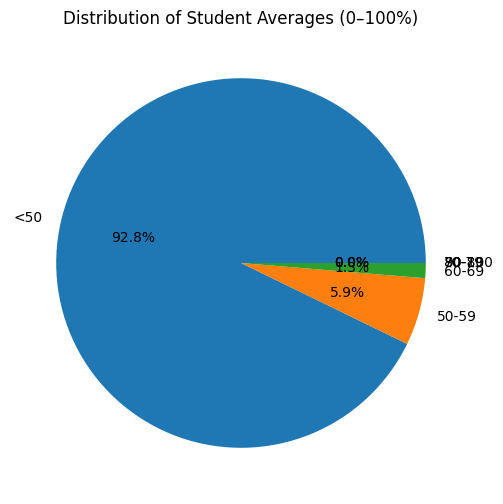

In [7]:
import matplotlib.pyplot as plt

bins = [0, 50, 60, 70, 80, 90, 100]
labels = ["<50", "50-59", "60-69", "70-79", "80-89", "90-100"]
df["Range"] = pd.cut(df["Average"], bins=bins, labels=labels, right=True)

range_counts = df["Range"].value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Student Averages (0–100%)")
plt.show()
